In [ ]:
# Importando bibliotecas importantese 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




## 1 Limpeza e tratamento dos dados


In [ ]:
# 1.1 - Importando base de dados.
dados_bruto =pd.read_csv('previsao de produtividade.csv')

# 1.2 -  Criar a versão limpa
dados_limpos = (dados_bruto.drop_duplicates().dropna())

# 1.3 -  Remover espaços no início e no fim apenas em colunas de texto
for col in dados_limpos.select_dtypes(include=['object']).columns:
    dados_limpos[col] = dados_limpos[col].str.lstrip().str.rstrip()

# 1.4 -  Padronizar nomes das colunas
dados_limpos.columns = (dados_limpos.columns.str
                        .strip().str # remove espaços extras no início e no fim.
                        .capitalize().str # coloca apenas a primeira letra da string em maiuscula.
                        .replace(' ', '_')) # troca espaços por underline "_"

# 1.5 -  Converter tipos de dados
dados_limpos = dados_limpos.convert_dtypes()

# 1.6 -  Resetar índice
dados_limpos = dados_limpos.reset_index(drop=True)

print("DataFrame Limpo:")
display(dados_limpos.head())


DataFrame Limpo:


,Ano,Área_colhida_(ha),Produção_(t),Produtividade_(t/ha),Chuva_acumulada_(mm),Temp_média_(°c),Dias_>34°c,Radiação_média_(mj/m²),Umidade_média_(%)
0,1993,205727,963718,4.27,1244,23.6,10,18.7,79.6
1,1994,214875,785408,4.47,1315,22.3,16,20.1,71.6
2,1995,213375,796652,4.12,1533,26.0,14,17.3,63.2
3,1996,200760,1092950,3.04,1302,23.5,11,19.5,74.6
4,1997,232489,836748,4.22,1053,22.7,10,19.0,61.2


## 2. Estatísticas descritivas

In [ ]:
# 2.1 -  dados_limpos.describe()
# 2.2 - remendo colunas inuteis na visualizacao das estatisticas.
dados_limpos.drop(columns=['Ano']).describe().round(2)


,Área_colhida_(ha),Produção_(t),Produtividade_(t/ha),Chuva_acumulada_(mm),Temp_média_(°c),Dias_>34°c,Radiação_média_(mj/m²),Umidade_média_(%)
count,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
mean,219312.65,887436.06,3.8,1134.44,24.26,11.74,18.33,69.14
std,15426.79,117927.56,0.44,242.13,1.53,3.89,1.8,6.26
min,200760.0,702143.0,3.04,810.0,22.2,5.0,15.2,60.1
25%,207129.5,788152.0,3.48,908.25,22.75,9.0,17.32,63.05
50%,213631.0,885202.0,3.78,1124.0,24.2,11.0,18.25,69.7
75%,233670.25,981386.75,4.18,1299.25,25.65,15.75,19.73,74.22
max,248537.0,1092950.0,4.47,1598.0,26.8,19.0,21.3,79.9


# 3. Questionamentos importantes

##### 1 - Produtividade


In [ ]:
# 1.1 - qual ano teve a menor produtividade?
# 1.2 - Qual ano teve a maior produtividade 
# 1.3 - Qual a tendência da produtividade ao longo dos anos (está crescendo, estável ou caindo (está crescendo, estável ou decrescente)?
# 1.4 - Existe clareza entre produtividade e área colhida ?
# 1.5 - Quais anos tiveram produtividade acima da média e o que os diferencia dos demais? e o que a diferença dos demais?


In [ ]:
# 1.1 - qual ano teve a menor produtividade?

# Metodo 1.

# Agrupar por ano e pegar a menor produtividade
menor_prod = dados_limpos.groupby('Ano')['Produtividade_(t/ha)'].min()

# Pegar ano e valor sem mostrar índice
ano_min = menor_prod.idxmin()
valor_min = menor_prod.min()

print(f"O ano com menor produtividade foi em {ano_min}, com {valor_min:.2f} t/ha.")

# Metodo 2.

# Carregar os dados
dados = pd.read_csv("previsao de produtividade.csv")

# Agrupar por ano e pegar a menor produtividade
menor_produtividade = (
    dados.groupby("Ano")["Produtividade (t/ha)"]
    .min()
    .reset_index()
    .sort_values("Produtividade (t/ha)")
    .head(1)
)

display(menor_produtividade)

# 1.2 - Qual ano teve a maior produtividade 
resultado = dados_limpos.groupby('Ano')['Produtividade_(t/ha)'].max()
maior_ano = resultado.idxmax()
maior_valor = resultado.max()

print(f'O ano com maior produtividade foi em {maior_ano:.2f}, com {maior_valor:.2f} t/ha.')

# 1.3 - Qual a tendência da produtividade ao longo dos anos (está crescendo, estável ou caindo (está crescendo, estável ou decrescente)?
media_por_ano = dados_limpos.groupby('Ano')['Produtividade_(t/ha)'].mean()

# Verificar se está crescendo, caindo ou estável
if media_por_ano.is_monotonic_increasing:
    tendencia = "crescendo"
elif media_por_ano.is_monotonic_decreasing:
    tendencia = "decrescente"
else:
    tendencia = "estável ou irregular"

print(f"\n A tendência da produtividade ao longo dos anos é: {tendencia}.")

# 1.4 - Existe clareza entre produtividade e área colhida ?
correlacao = dados_limpos['Produtividade_(t/ha)'].corr(dados_limpos['Área_colhida_(ha)'])

print(f"\n A correlação entre produtividade e área colhida é {correlacao:.2f}.")

# 1.5 - Quais anos tiveram produtividade acima da média?
anos_acima_media = dados_limpos.groupby('Ano', as_index=False)['Produtividade_(t/ha)'].mean()
anos_acima_media = anos_acima_media.query("`Produtividade_(t/ha)` > `Produtividade_(t/ha)`.mean()")

display(anos_acima_media)
qte_acima_media = len(anos_acima_media)

print(f'Foram {qte_acima_media } anos que superam a media')


O ano com menor produtividade foi em 1996, com 3.04 t/ha.


,Ano,Produtividade (t/ha)
3,1996,3.04


O ano com maior produtividade foi em 1994.00, com 4.47 t/ha.

 A tendência da produtividade ao longo dos anos é: estável ou irregular.

 A correlação entre produtividade e área colhida é 0.01.


C:\Users\NAILS\AppData\Local\Temp\ipykernel_4932\2560645774.py:57: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  anos_acima_media = anos_acima_media.query("`Produtividade_(t/ha)` > `Produtividade_(t/ha)`.mean()")


,Ano,Produtividade_(t/ha)
0,1993,4.27
1,1994,4.47
2,1995,4.12
4,1997,4.22
6,1999,4.28
7,2000,4.35
8,2001,4.16
10,2003,4.33
11,2004,4.06
14,2007,3.8


Foram 16 anos que superam a media


##### 2 - Precipitação (chuva) 

In [ ]:
# 2.1 - qual ano teve maior precipitação?
# 2.2 - os 3 anos mais chuvosos?
# 2.3 - os 3 anos menos chuvosos?
# 2.4 - Existe relação entre chuva acumulada e produtividade ?
# 2.5 - Qual o limite mínimo de chuva para manter uma produtividade acima de 4 t/ha? para manter produtividade acima de 4 t/ha?
# 2.6 - Nos anos mais chuvosos, houve aumento proporcional na produção ou apenas na área colhida?
# 2.7 - Há votos de excesso de chuva prejudicando a produtividade? e produtividade?

,Ano,Chuva_acumulada_(mm)
5,1998,1598


,Ano,Chuva_acumulada_(mm)
5,1998,1598
14,2007,1582
2,1995,1533


,Ano,Chuva_acumulada_(mm)
27,2020,810
8,2001,812
33,2026,833


Correlação: 0.24
Limite mínimo observado: 812 mm


,Ano,Chuva_acumulada_(mm),Produção_(t),Área_colhida_(ha),Produtividade_(t/ha)
5,1998,1598,763454,227326,3.35841
14,2007,1582,1069757,212898,5.02474
2,1995,1533,796652,213375,3.733577
16,2009,1531,830296,246654,3.366238
11,2004,1481,869920,213629,4.072106


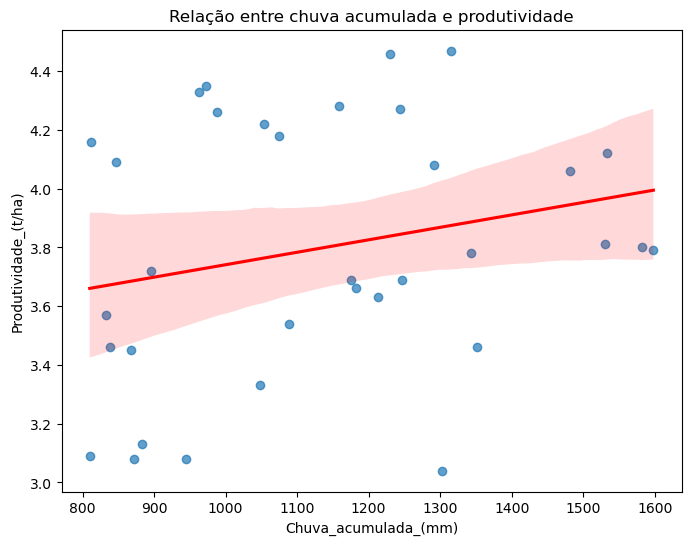

In [ ]:
# 2.1 - qual ano teve maior precipitação?
ano_maior_chuva = (
    dados_limpos.groupby('Ano', as_index=False)['Chuva_acumulada_(mm)']
    .sum()
    .sort_values('Chuva_acumulada_(mm)', ascending=False)
    .head(1)
)
display(ano_maior_chuva)

# 2.2 - os 3 anos mais chuvosos?
top3_chuvosos = (
    dados_limpos.groupby('Ano', as_index=False)['Chuva_acumulada_(mm)']
    .sum()
    .sort_values('Chuva_acumulada_(mm)', ascending=False)
    .head(3)
)
display(top3_chuvosos)

# 2.3 - os 3 anos menos chuvosos?
top3_menos_chuvosos = (
    dados_limpos.groupby('Ano', as_index=False)['Chuva_acumulada_(mm)']
    .sum()
    .sort_values('Chuva_acumulada_(mm)', ascending=True)
    .head(3)
)
display(top3_menos_chuvosos)

# 2.4 - Existe relação entre chuva acumulada e produtividade ?
correlacao = dados_limpos['Chuva_acumulada_(mm)'].corr(dados_limpos['Produtividade_(t/ha)'])
print(f"Correlação: {correlacao:.2f}")

# 2.5 - Qual o limite mínimo de chuva para manter uma produtividade acima de 4 t/ha? 
prod_acima_4 = dados_limpos[dados_limpos['Produtividade_(t/ha)'] > 4]
limite_min_chuva = prod_acima_4['Chuva_acumulada_(mm)'].min()
print(f"Limite mínimo observado: {limite_min_chuva} mm")

# 2.6 - Nos anos mais chuvosos, houve aumento proporcional na produção ou apenas na área colhida?
anos_chuva_producao = (
    dados_limpos.groupby('Ano', as_index=False)[['Chuva_acumulada_(mm)', 'Produção_(t)', 'Área_colhida_(ha)']]
    .sum()
    .sort_values('Chuva_acumulada_(mm)', ascending=False)
)

anos_chuva_producao['Produtividade_(t/ha)'] = anos_chuva_producao['Produção_(t)'] / anos_chuva_producao['Área_colhida_(ha)']
display(anos_chuva_producao.head(5))

# 2.7 - Há votos de excesso de chuva prejudicando a produtividade? e produtividade?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    x='Chuva_acumulada_(mm)',
    y='Produtividade_(t/ha)',
    data=dados_limpos,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title('Relação entre chuva acumulada e produtividade')
plt.show()


##### 3 - Temperatura

In [ ]:
# 3.1 -  Qual o impacto da temperatura média  na produtividade?
# 3.2 - O número de dias >34°C  afeta diretamente a produção?
# 3.3 - Existe um ponto ótimo de temperatura  para maior produtividade?

Correlação entre temperatura média e produtividade: 0.10


,Ano,Produção_(t),Dias_>34°c
0,1993,963718,10
1,1994,785408,16
2,1995,796652,14
3,1996,1092950,11
4,1997,836748,10
5,1998,763454,16
6,1999,754077,12
7,2000,878188,13
8,2001,796384,8
9,2002,984340,17


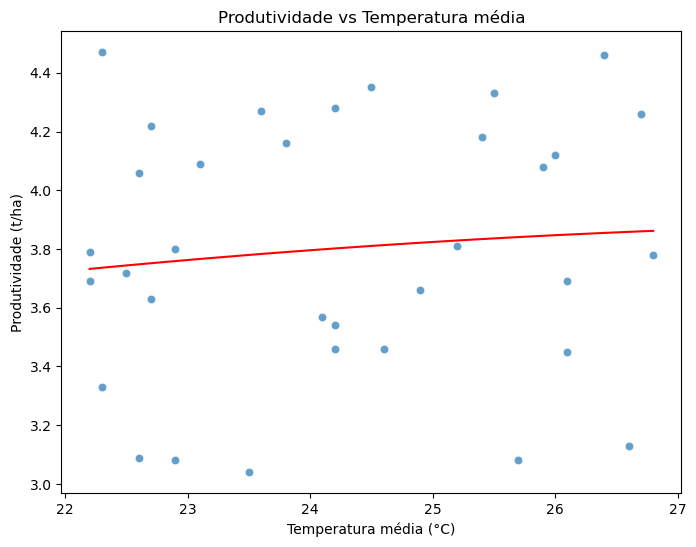

In [ ]:
# 3.1 - Correlação entre temperatura média e produtividade
correlacao_temp = dados_limpos['Temp_média_(°c)'].corr(dados_limpos['Produtividade_(t/ha)'])
print(f"Correlação entre temperatura média e produtividade: {correlacao_temp:.2f}")

# 3.2 - Impacto dos dias acima de 34°C na produção
impacto_dias_quentes = dados_limpos.groupby('Ano', as_index=False)[['Produção_(t)', 'Dias_>34°c']].sum()
display(impacto_dias_quentes)


# Gráfico de dispersão: Produtividade vs Temp_média_(°c)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Temp_média_(°c)',
    y='Produtividade_(t/ha)',
    data=dados_limpos,
    alpha=0.7
)

# Ajuste polinomial (curva em U ou sino)
x = dados_limpos['Temp_média_(°c)']
y = dados_limpos['Produtividade_(t/ha)']
poly = np.poly1d(np.polyfit(x, y, 2))  # ajuste quadrático
plt.plot(np.sort(x), poly(np.sort(x)), color='red')

plt.title('Produtividade vs Temperatura média')
plt.xlabel('Temperatura média (°C)')
plt.ylabel('Produtividade (t/ha)')
plt.show()



##### 4 - Radiação e Umidade

In [ ]:


# 4.1 - A radiação média  está correlacionada com a produtividade?
# 4.2 - Em anos de maior radiação, a produtividade foi maior ou menor?
# 4.3 - A umidade média  influencia mais a produção ou a produtividade?

In [ ]:
# 4.1 - Correlação entre radiação média e produtividade
correlacao_radiacao = dados_limpos['Radiação_média_(mj/m²)'].corr(dados_limpos['Produtividade_(t/ha)'])
print(f"Correlação entre radiação média e produtividade: {correlacao_radiacao:.2f}")

# 4.2 - Comparar radiação média e produtividade por ano
anos_radiacao = (
    dados_limpos.groupby('Ano', as_index=False)[['Radiação_média_(mj/m²)', 'Produtividade_(t/ha)']]
    .mean()
    .sort_values('Radiação_média_(mj/m²)', ascending=False)
)

display(anos_radiacao.head(5))  # mostra os 5 anos com maior radiação

# 4.3 - Correlação da umidade com produção e produtividade
correlacao_umidade_producao = dados_limpos['Umidade_média_(%)'].corr(dados_limpos['Produção_(t)'])
correlacao_umidade_produtividade = dados_limpos['Umidade_média_(%)'].corr(dados_limpos['Produtividade_(t/ha)'])

print(f"Correlação com Produção: {correlacao_umidade_producao:.2f}")
print(f"Correlação com Produtividade: {correlacao_umidade_produtividade:.2f}")



Correlação entre radiação média e produtividade: -0.09


,Ano,Radiação_média_(mj/m²),Produtividade_(t/ha)
5,1998,21.3,3.79
20,2013,21.1,3.33
12,2005,20.8,3.69
28,2021,20.7,3.46
14,2007,20.7,3.8


Correlação com Produção: 0.27
Correlação com Produtividade: -0.12


##### 5 -  Perguntas de negócio (mais estratégicas)

In [ ]:


# 5.1 - Quais variações climáticas explicam melhor a variação da produtividade ?
# 5.2 - Qual seria o cenário ideal de clima  para atingir a produtividade máxima?
# 5.3 - Em anos de baixa produtividade, quais fatores foram mais críticos (chuva, temperatura, radiação)?
# 5.4 - Qual o risco financeiro  de anos abaixo de 25% de produtividade?
# 5.5 - É possível prever anos de baixa produtividade  com base em padrões climáticos (ex.: El Niño/La Niña)?
# 5.6 - Se a área colhida aumenta, a produtividade acompanha ou há diminuição da eficiência ?

In [ ]:
# 5.1 - Correlação da produtividade com variáveis climáticas
variaveis_climaticas = ['Chuva_acumulada_(mm)', 'Temp_média_(°c)', 'Dias_>34°c',
                        'Radiação_média_(mj/m²)', 'Umidade_média_(%)']

correlacoes = dados_limpos[variaveis_climaticas].corrwith(dados_limpos['Produtividade_(t/ha)'])
#print(correlacoes)

# 5.2 - Cenário ideal de clima
top_produtividade = dados_limpos[dados_limpos['Produtividade_(t/ha)'] == dados_limpos['Produtividade_(t/ha)'].max()]
cenario_ideal = top_produtividade[['Chuva_acumulada_(mm)', 'Temp_média_(°c)', 'Dias_>34°c',
                                   'Radiação_média_(mj/m²)', 'Umidade_média_(%)']].mean()
print( 'Este é o cenario ideal.')
print('\n')
print(cenario_ideal)

# 5.3 - Médias climáticas nos anos de baixa produtividade
anos_baixa = dados_limpos[dados_limpos['Produtividade_(t/ha)'] < dados_limpos['Produtividade_(t/ha)'].quantile(0.25)]
fatores_criticos = anos_baixa[['Chuva_acumulada_(mm)', 'Temp_média_(°c)', 'Radiação_média_(mj/m²)']].mean()
print('\nMedias climaticas nos ano  de baixa produtividade')
fatores_criticos = fatores_criticos.round(2)
print('\n')
print(fatores_criticos)



# 5.4 - Correlação entre área colhida e produtividade
correlacao_area_produtividade = dados_limpos['Área_colhida_(ha)'].corr(dados_limpos['Produtividade_(t/ha)'])
print(f"\nCorrelação entre área colhida e produtividade: {correlacao_area_produtividade:.2f}")



Este é o cenario ideal.


Chuva_acumulada_(mm)      1315.0
Temp_média_(°c)             22.3
Dias_>34°c                  16.0
Radiação_média_(mj/m²)      20.1
Umidade_média_(%)           71.6
dtype: Float64

Medias climaticas nos ano  de baixa produtividade


Chuva_acumulada_(mm)      991.0
Temp_média_(°c)           24.28
Radiação_média_(mj/m²)    18.76
dtype: Float64

Correlação entre área colhida e produtividade: 0.01


In [ ]:
# 5.4 - Risco financeiro de anos abaixo de 25% da produtividade

# Garantir que a coluna seja numérica
dados_limpos['Produtividade_(t/ha)'] = pd.to_numeric(dados_limpos['Produtividade_(t/ha)'], errors='coerce')

# Produtividade média
media_produtividade = dados_limpos['Produtividade_(t/ha)'].mean()

# Filtrar anos de risco
anos_risco = dados_limpos[dados_limpos['Produtividade_(t/ha)'] < 0.25 * media_produtividade].copy()

if anos_risco.empty:
    print("Não houve anos com produtividade abaixo de 25% da média.")
else:
    # Calcular perda financeira
    preco_por_tonelada = 1000
    anos_risco['Perda_financeira'] = (media_produtividade - anos_risco['Produtividade_(t/ha)']) * preco_por_tonelada
    
    display(anos_risco[['Ano','Produtividade_(t/ha)','Perda_financeira']])
    print(f"Perda média estimada: R${anos_risco['Perda_financeira'].mean():,.2f}")



Não houve anos com produtividade abaixo de 25% da média.


# CRIANDO E TREINANDO MODELOS

In [ ]:
# 5.5 - Modelo preditivo simples de produtividade
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Variáveis independentes (clima)
X = dados_limpos[['Chuva_acumulada_(mm)', 'Temp_média_(°c)', 'Dias_>34°c',
                  'Radiação_média_(mj/m²)', 'Umidade_média_(%)']]

# Variável dependente (produtividade)
y = dados_limpos['Produtividade_(t/ha)']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
modelo = LinearRegression().fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Coeficientes (impacto de cada variável)
coeficientes = pd.Series(modelo.coef_, index=X.columns)
print("\nImpacto das variáveis climáticas na produtividade:")
print(coeficientes)


NameError: name 'dados_limpos' is not defined

In [ ]:
# 5.5 - Classificação de risco de baixa produtividade
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Criar variável alvo binária: 1 = ano de risco, 0 = ano normal
media_produtividade = dados_limpos['Produtividade_(t/ha)'].mean()
dados_limpos['Risco'] = (dados_limpos['Produtividade_(t/ha)'] < media_produtividade).astype(int)

# Variáveis independentes (clima)
X = dados_limpos[['Chuva_acumulada_(mm)', 'Temp_média_(°c)', 'Dias_>34°c',
                  'Radiação_média_(mj/m²)', 'Umidade_média_(%)']]

# Variável alvo (risco)
y = dados_limpos['Risco']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de classificação (Random Forest)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred = modelo_rf.predict(X_test)

# Avaliação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Importância das variáveis
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportância das variáveis climáticas para prever risco:")
print(importancias)


Matriz de Confusão:
[[1 2]
 [1 3]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7


Importância das variáveis climáticas para prever risco:
Chuva_acumulada_(mm)      0.272280
Radiação_média_(mj/m²)    0.218887
Temp_média_(°c)           0.202618
Umidade_média_(%)         0.175615
Dias_>34°c                0.130600
dtype: float64


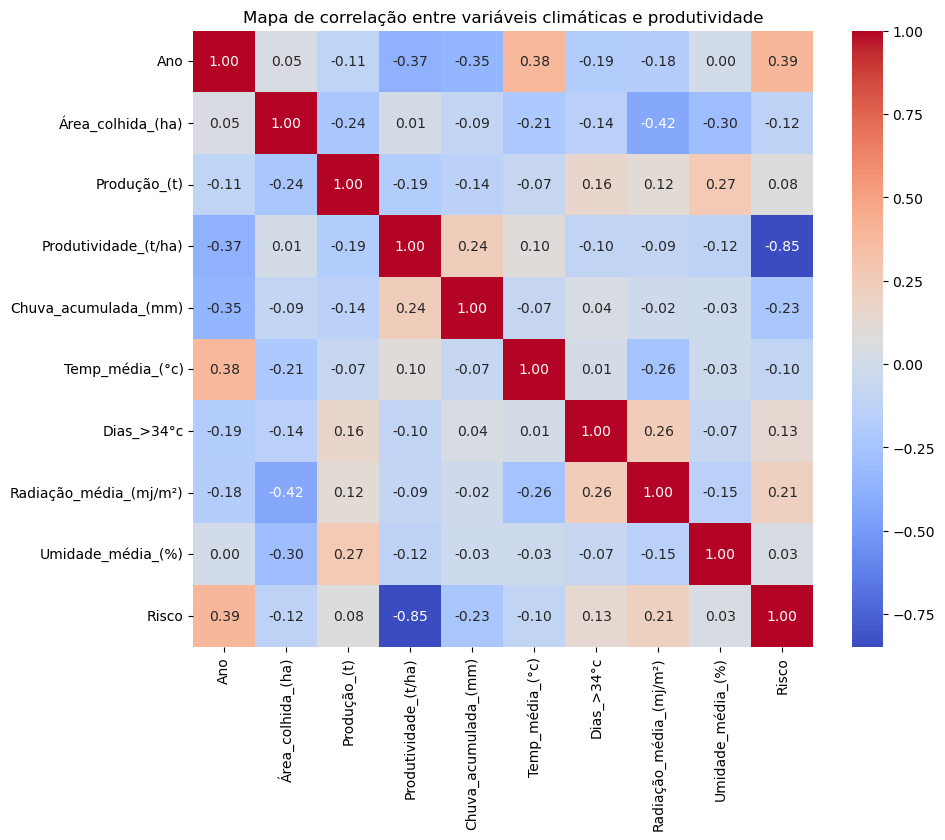

In [ ]:
# 5.1 - Heatmap de correlação
plt.figure(figsize=(10,8))
sns.heatmap(
    dados_limpos.corr(),
    annot=True,          # mostra os valores numéricos
    cmap='coolwarm',     # escala de cores
    fmt=".2f"            # duas casas decimais
)
plt.title("Mapa de correlação entre variáveis climáticas e produtividade")
plt.show()


Cenário climático ideal para máxima produtividade:
Chuva_acumulada_(mm)      1315.0
Temp_média_(°c)             22.3
Dias_>34°c                  16.0
Radiação_média_(mj/m²)      20.1
Umidade_média_(%)           71.6
dtype: Float64


C:\Users\NAILS\AppData\Local\Temp\ipykernel_4932\2559536287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cenario_ideal.index, y=cenario_ideal.values, palette="viridis")


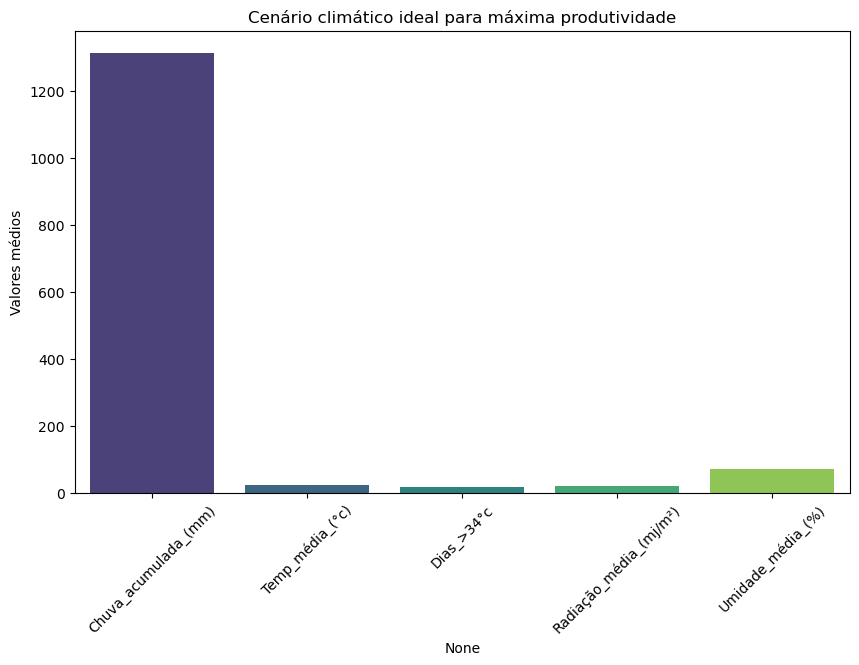

In [ ]:
# Selecionar o(s) ano(s) com maior produtividade
top_produtividade = dados_limpos[dados_limpos['Produtividade_(t/ha)'] == dados_limpos['Produtividade_(t/ha)'].max()]

# Extrair médias das variáveis climáticas nesses anos
cenario_ideal = top_produtividade[['Chuva_acumulada_(mm)', 'Temp_média_(°c)', 'Dias_>34°c',
                                   'Radiação_média_(mj/m²)', 'Umidade_média_(%)']].mean()

print("Cenário climático ideal para máxima produtividade:")
print(cenario_ideal.round(2))

# Gráfico comparativo
plt.figure(figsize=(10,6))
sns.barplot(x=cenario_ideal.index, y=cenario_ideal.values, palette="viridis")
plt.title("Cenário climático ideal para máxima produtividade")
plt.ylabel("Valores médios")
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Definir quartis de produtividade
q25 = dados_limpos['Produtividade_(t/ha)'].quantile(0.25)
q75 = dados_limpos['Produtividade_(t/ha)'].quantile(0.75)

# Separar anos de baixa e alta produtividade
anos_baixa = dados_limpos[dados_limpos['Produtividade_(t/ha)'] < q25]
anos_alta = dados_limpos[dados_limpos['Produtividade_(t/ha)'] > q75]

# Calcular médias climáticas em cada grupo
comparacao = pd.DataFrame({
    "Baixa Produtividade": anos_baixa[['Chuva_acumulada_(mm)','Temp_média_(°c)','Radiação_média_(mj/m²)','Umidade_média_(%)']].mean(),
    "Alta Produtividade": anos_alta[['Chuva_acumulada_(mm)','Temp_média_(°c)','Radiação_média_(mj/m²)','Umidade_média_(%)']].mean()
})

print("Comparação entre anos de baixa e alta produtividade:")
display(comparacao.round(2))


Comparação entre anos de baixa e alta produtividade:


,Baixa Produtividade,Alta Produtividade
Chuva_acumulada_(mm),991.0,1111.0
Temp_média_(°c),24.28,24.59
Radiação_média_(mj/m²),18.76,18.5
Umidade_média_(%),69.13,69.16


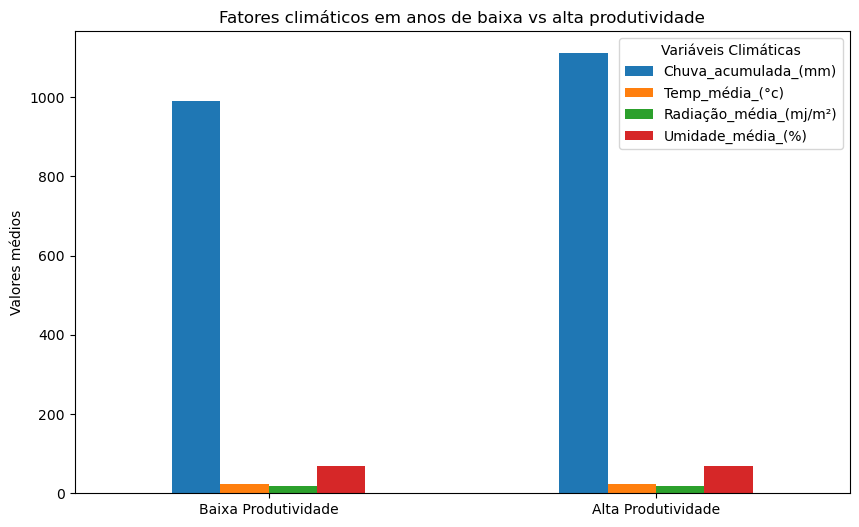

In [ ]:

# Gráfico comparativo
comparacao.T.plot(kind='bar', figsize=(10,6))
plt.title("Fatores climáticos em anos de baixa vs alta produtividade")
plt.ylabel("Valores médios")
plt.xticks(rotation=0)
plt.legend(title="Variáveis Climáticas")
plt.show()


In [2]:
print('euuuuu')

euuuuu
